In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.txt', delimiter=';')

In [4]:
df.head()

,Name,Disp.energy,Rep.,2000,1674,1408,1184,995.5,837.1,703.9,...,0.061,0.051,0.043,0.036,0.03,0.0255,0.0215,0.0181,0.0152,0.0128
0,Podzol_E,65,1,0.0,0.0,0.0,0.00,0.01,0.09,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Podzol_E,130,1,0.0,0.0,0.0,0.00,0.00,0.00,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Podzol_E,194,1,0.0,0.0,0.0,0.01,0.07,0.09,0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Podzol_E,259,1,0.0,0.0,0.0,0.00,0.01,0.07,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Podzol_E,324,1,0.0,0.0,0.0,0.01,0.08,0.09,0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.shape

(216, 73)

In [5]:
df['Rep.'].value_counts()

1    216
Name: Rep., dtype: int64

In [7]:
df['Name'].value_counts()

Ferr_A              12
Podzol_E            12
Chernozem_B         12
Vert_Aspot          12
Vert_A              12
Podzol_BHFi         12
Slitaya_AEL         12
Chernozem_Aca       12
Podzolistaya_Eh1    12
Podzolistaya_ELe    12
Der-Podz_P          12
Der-Podz_BT1        12
Chernozem_AY        12
Slitaya_BT1         12
Der-Podz_EL         12
Ferr_B1             12
Ferr_B2             12
Slitaya_AY          12
Name: Name, dtype: int64

In [13]:
df['Disp.energy'].value_counts()

971     18
712     18
453     18
194     18
389     18
130     18
1101    18
842     18
583     18
324     18
65      18
259     18
Name: Disp.energy, dtype: int64

In [10]:
dummy_soil_types = pd.get_dummies(df['Name'], drop_first=True)

In [11]:
df_dummies = pd.concat([df, dummy_soil_types], axis=1)

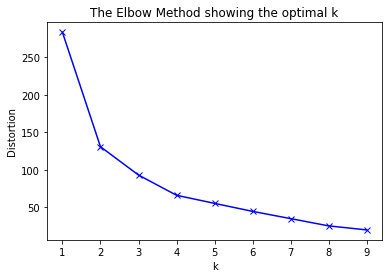

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_dummies.drop('Name', axis=1))
    kmeanModel.fit(df_dummies.drop('Name', axis=1))
    distortions.append(sum(np.min(cdist(df_dummies.drop('Name', axis=1), kmeanModel.cluster_centers_, 'euclidean'), 
                                  axis=1)) / df_dummies.drop('Name', axis=1).shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [15]:
# Кластеризация K-means.
from sklearn.cluster import KMeans

numb_clusters = 2

km = KMeans(n_clusters=numb_clusters)

km.fit(df_dummies.drop('Name', axis=1))

clusters = km.labels_.tolist()

In [21]:
clusterized_df = df
clusterized_df['Cluster'] = clusters

In [23]:
clusterized_df['Cluster'].value_counts()

0    126
1     90
Name: Cluster, dtype: int64

In [24]:
clusterized_df[['Name', 'Disp.energy', 'Cluster']]

,Name,Disp.energy,Cluster
0,Podzol_E,65,0
1,Podzol_E,130,0
2,Podzol_E,194,0
3,Podzol_E,259,0
4,Podzol_E,324,0
5,Podzol_E,389,0
6,Podzol_E,453,0
7,Podzol_E,583,1
8,Podzol_E,712,1
9,Podzol_E,842,1
